In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\tips.csv")

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# 1. Five Number Summary For bill and tip

In [7]:
# Five Number Summary for Bill

bill = df.total_bill

print("Maximum Bill = ",np.max(bill))
print("Minimum Bill = ",np.min(bill))
print("Standard Deviation = ",np.std(bill))
print("Median =",np.median(bill))
print("Mean = ",np.mean(bill))

Maximum Bill =  50.81
Minimum Bill =  3.07
Standard Deviation =  8.88415057777113
Median = 17.795
Mean =  19.78594262295082


In [8]:
# Five Number Summary for tip 

tip = df.tip

print("Maximum Bill = ",np.max(tip))
print("Minimum Bill = ",np.min(tip))
print("Standard Deviation = ",np.std(tip))
print("Median =",np.median(tip))
print("Mean = ",np.mean(tip))

Maximum Bill =  10.0
Minimum Bill =  1.0
Standard Deviation =  1.3807999538298958
Median = 2.9
Mean =  2.99827868852459


In [9]:
df.describe()  #Show the mean, median, std and much more.

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# 2.Plot the Box plot diagram for "Total Bill" and "Tip"¶

Box Plot for the total bill


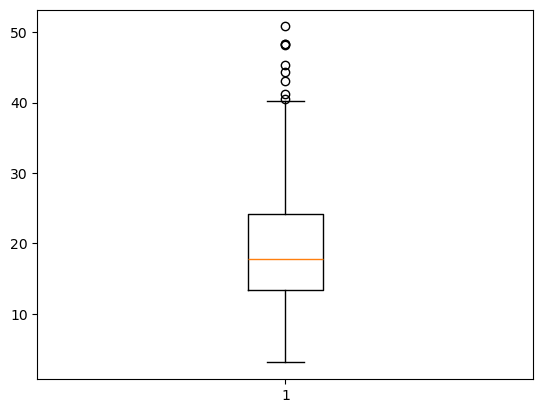

In [10]:
# Boxplot for the total bill using matplotlib

print("Box Plot for the total bill")
plt.boxplot(bill) 
plt.show()

<Axes: xlabel='total_bill'>

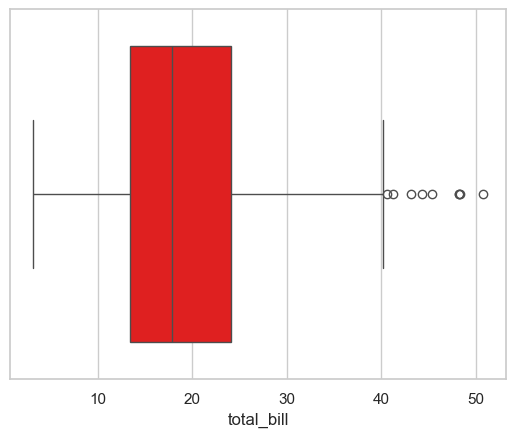

In [11]:
#using seaborn

sns.set(style="whitegrid")
box_plot= sns.boxplot(x="total_bill",data=df,color='red')
box_plot

Box Plot for the tip 


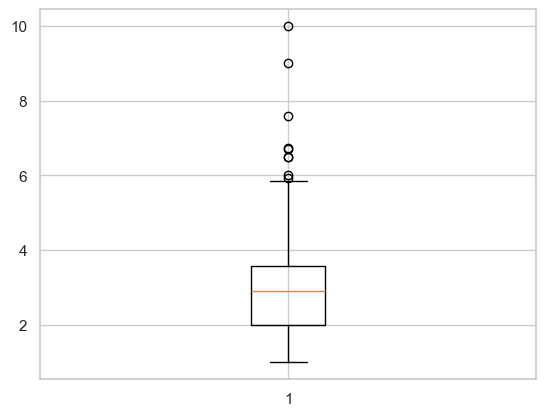

In [12]:
# Boxplot for the tip using matplotlib


print("Box Plot for the tip ")
plt.boxplot(tip)
plt.show()

<Axes: xlabel='tip'>

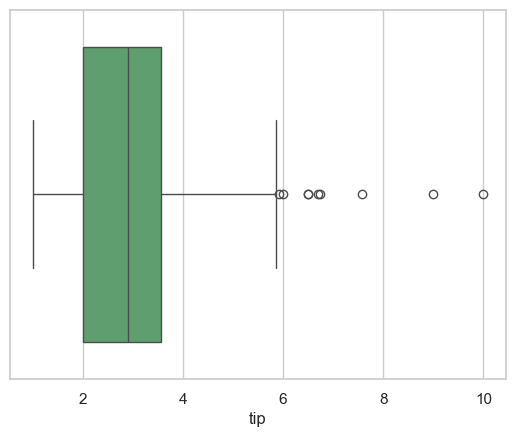

In [13]:
#Using Seaborn

sns.set(style="whitegrid")
box_plot= sns.boxplot(x="tip",data=df,color='g')
box_plot

# 3. Analyze the diagram to mark the skewness in the data

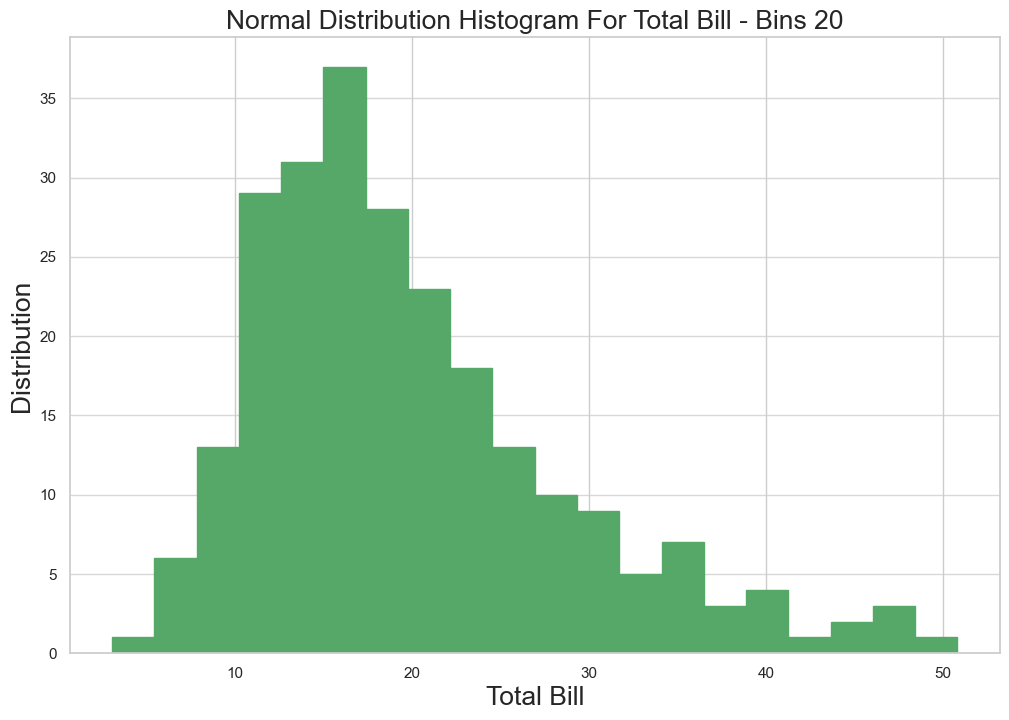

In [14]:
# Normal Distribution Histogram For Total Bill

plt.figure(figsize=[12,8])
plt.hist(x=bill, bins=20, color = 'g',edgecolor="g")
plt.xlabel("Total Bill",fontsize=19)
plt.ylabel("Distribution",fontsize=19)
plt.title('Normal Distribution Histogram For Total Bill - Bins 20',fontsize=19)
plt.grid(axis='y', alpha=0.75)
plt.show()

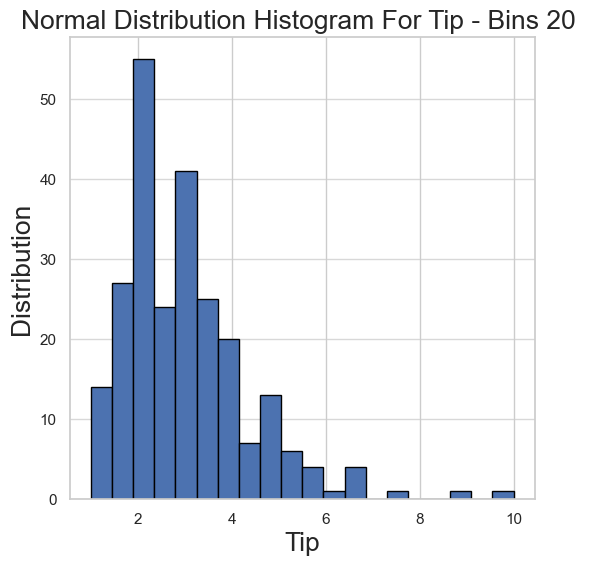

In [15]:
# Normal Distribution Histogram For Tip

plt.figure(figsize=[6,6])

plt.hist(x=tip, bins=20, color = 'b', edgecolor="black")

plt.xlabel("Tip",fontsize=19)
plt.ylabel("Distribution",fontsize=19)

plt.title('Normal Distribution Histogram For Tip - Bins 20 ',fontsize=19)

plt.grid(axis='y', alpha=0.75)

plt.show()

# 4. Find out the outliers for "Total Bill" and "Tip"

***The plot shows 8 points outside the box, these are outliers as there are not includedin the box of other observation i.e no where near the quartiles.***


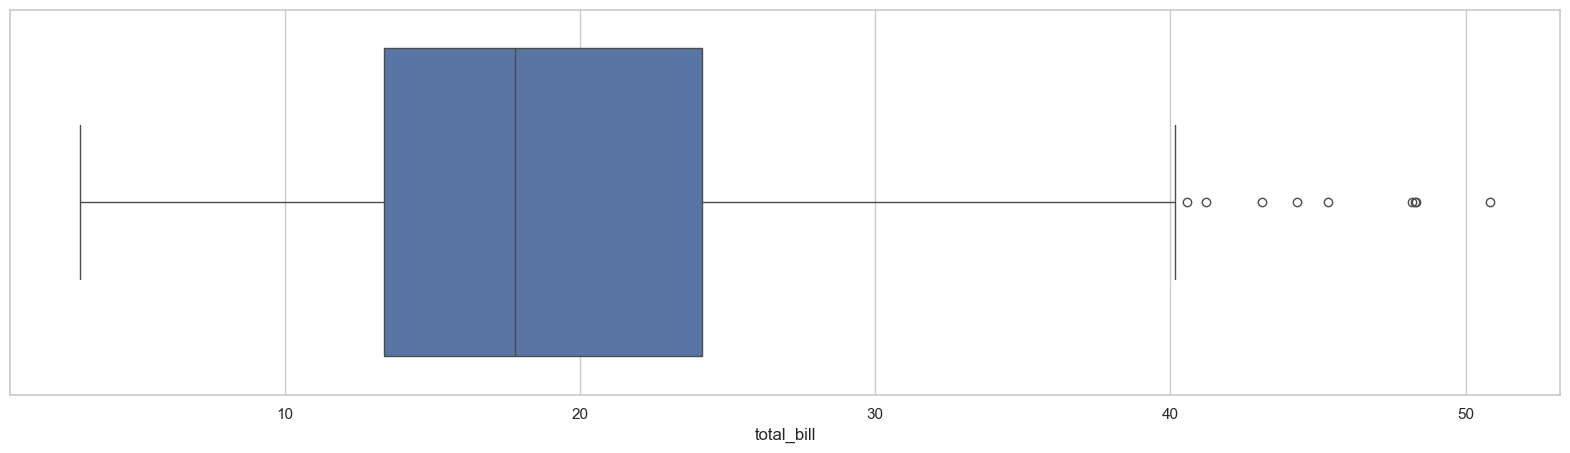

In [16]:
# outliers in bill column

plt.figure(figsize=(20,5))

sns.boxplot(x=bill, color='b')


print("***The plot shows 8 points outside the box, these are outliers as there are not included"
      "in the box of other observation i.e no where near the quartiles.***")

***The plot shows 8 points outside the box,these are outliers as there are not included in the box of other observation i.e no where near the quartiles.***


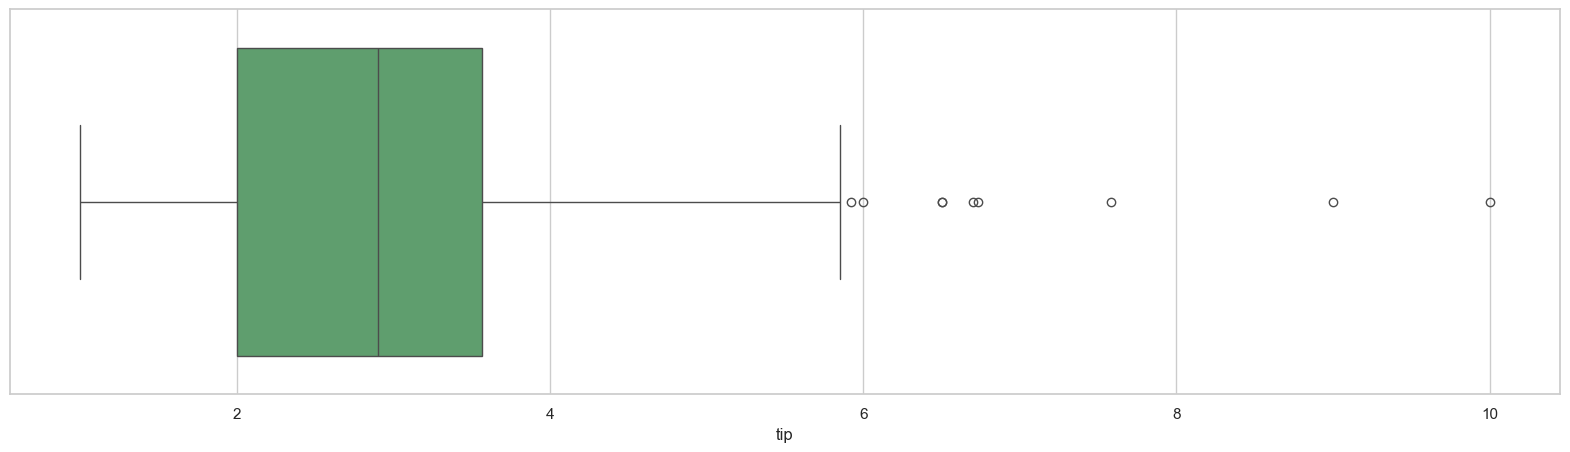

In [17]:
# outliers in tip column

plt.figure(figsize=(20,5))

sns.boxplot(x=tip, color='g')

print("***The plot shows 8 points outside the box,"
      "these are outliers as there are not included in the box of other observation i.e no where near the quartiles.***")

In [18]:
# IQR Value


bill_tip = pd.DataFrame(df,columns=['total_bill','tip','size'])

print(bill_tip)

print("\n \n ")
print("\n \n ")


print("IQR For Total Bill : ",stats.iqr(bill))
print("IQR For Tip : ",stats.iqr(tip))
print("IQR For Total Bill & Tip : ",stats.iqr(bill_tip))
     

     total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]

 
 

 
 
IQR For Total Bill :  10.779999999999998
IQR For Tip :  1.5625
IQR For Total Bill & Tip :  11.302499999999998


# 6.Plot the histogram for "Total Bill" and "Tip"

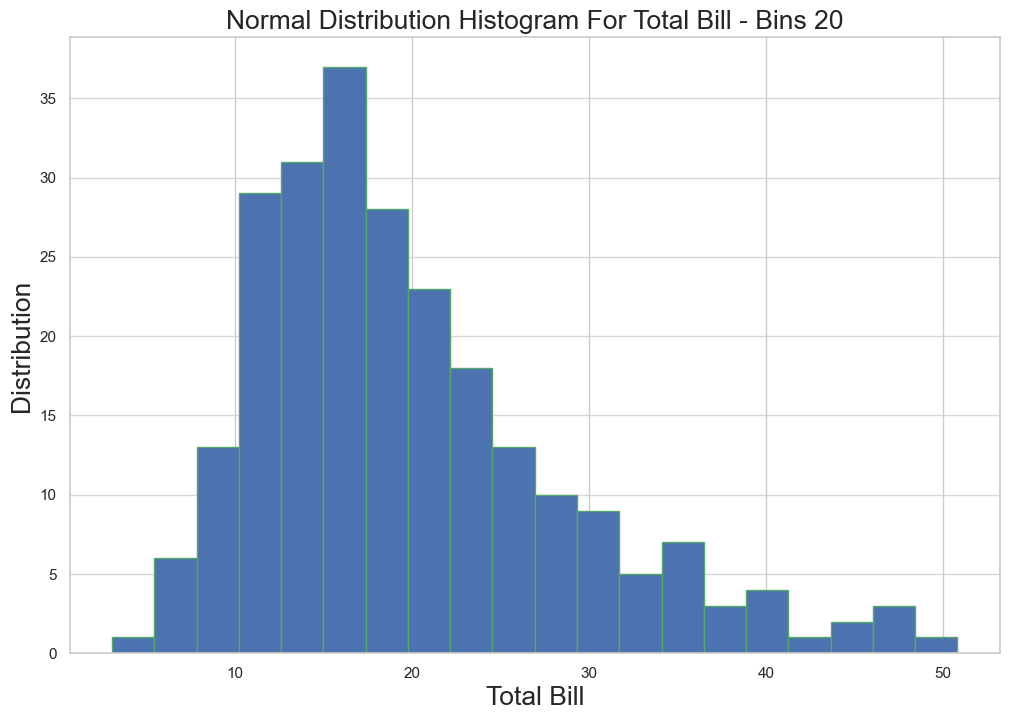

In [19]:
# Normal Distribution Histogram For Total Bill

plt.figure(figsize=[12,8])
plt.hist(x=bill, bins=20, color = 'b', edgecolor="g")
plt.xlabel("Total Bill",fontsize=19)
plt.ylabel("Distribution",fontsize=19)
plt.title('Normal Distribution Histogram For Total Bill - Bins 20',fontsize=19)
plt.grid(axis='y', alpha=0.75)
plt.show()

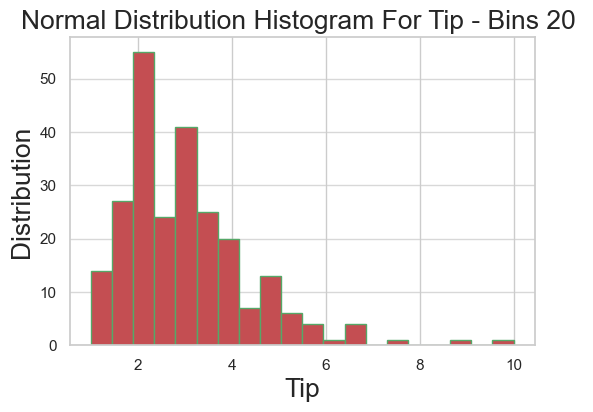

In [20]:
# Normal Distribution Histogram For Tip

plt.figure(figsize=[6,4])
plt.hist(x=tip, bins=20, color = 'r', edgecolor="g")
plt.xlabel("Tip",fontsize=19)
plt.ylabel("Distribution",fontsize=19)
plt.title('Normal Distribution Histogram For Tip - Bins 20 ',fontsize=19)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 7.Identify skewness in each. Type of skewness and the possible reason for the skewness

In [21]:
print("In Total_bill \n")

print("***The long tail is on the right side so the histogram is Skewed Right So,[Mean > Median]***")

In Total_bill 

***The long tail is on the right side so the histogram is Skewed Right So,[Mean > Median]***


In [22]:
print("In Tip \n")

print("***The long tail is on the right side so the histogram is Skewed Right So,[Mean > Median]***")

In Tip 

***The long tail is on the right side so the histogram is Skewed Right So,[Mean > Median]***


# 8. Plot the cumulative Frequency Polygon for "Total Bill" and "Tip"

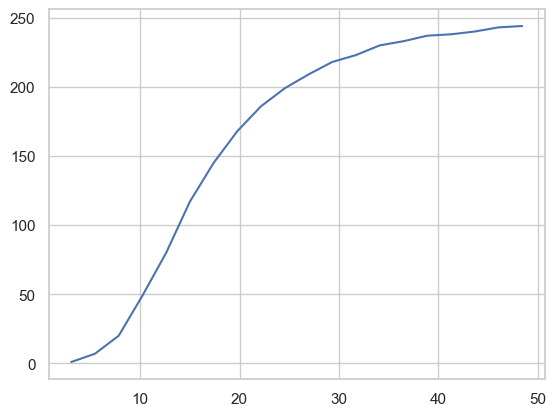

In [23]:
# Plotting Cumulative Frequency Polygon for "Total Bill" Column

values, base = np.histogram(bill, bins=20)

cumulative = np.cumsum(values)      

plt.plot(base[:-1], cumulative)

#plt.title('Total Bill',fontsize=15)
plt
#plt.grid(axis='y', alpha=0.75)
#plt.grid(axis='x', alpha=0.75)
plt.show()

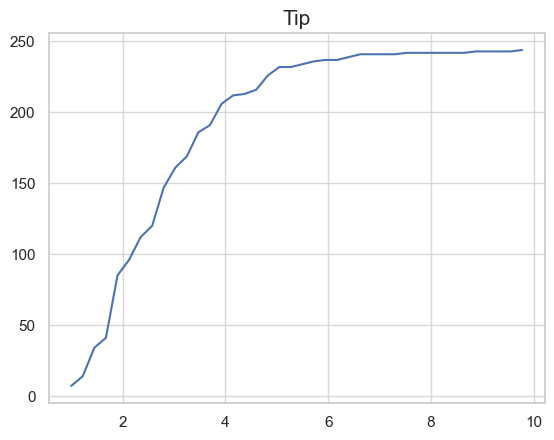

In [24]:
# Plotting Cumulative Frequency Polygon for "Tip" Column

values, base = np.histogram(tip, bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative)
plt.title('Tip',fontsize=15)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.show()

# 8. Prepare the Frequency Table and Bar Chart for "Size". Summarize and explain your findings¶

In [25]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Frequency Table for Size
col_0  count
size        
1          4
2        156
3         38
4         37
5          5
6          4


<Axes: xlabel='size'>

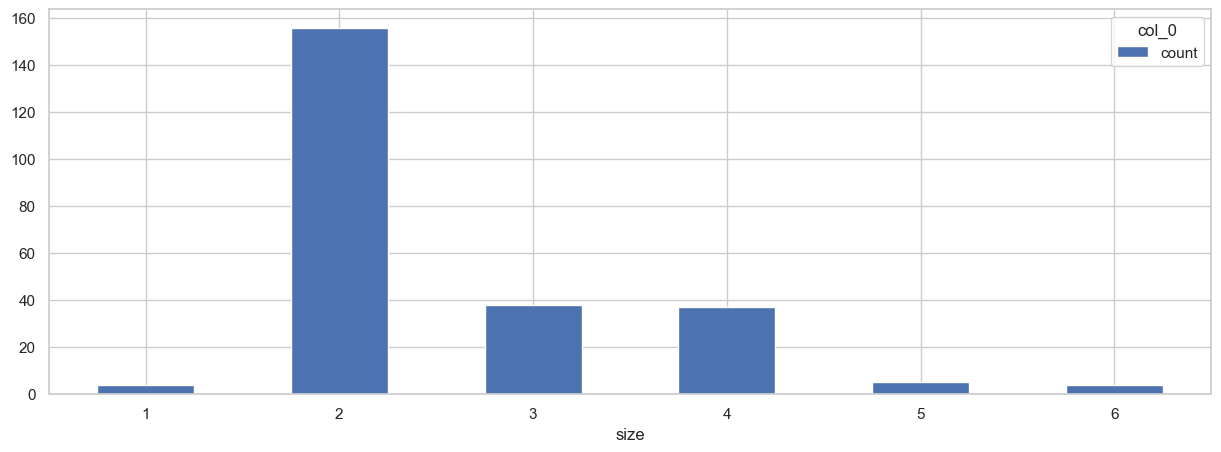

In [26]:
# Frequency table and Bar Chart

print("Frequency Table for Size")
size = pd.crosstab(index=df['size'],columns='count')
print(size)
size.plot.bar(figsize=(15,5),rot=0)

In [27]:
x = pd.crosstab(index=df["size"], columns=df["tip"],margins=True)   
x

tip,1.0,1.01,1.1,1.17,1.25,1.32,1.36,1.44,1.45,1.47,...,5.85,5.92,6.0,6.5,6.7,6.73,7.58,9.0,10.0,All
size,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2,1,1,1,3,1,0,2,1,1,...,1,0,0,0,0,0,0,0,0,156
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,38
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,0,37
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
All,4,1,1,1,3,1,1,2,1,1,...,1,1,1,2,1,1,1,1,1,244


In [28]:
y = pd.crosstab(index=df["size"], columns=df["total_bill"],margins=True)
y

total_bill,3.07,5.75,7.25,7.51,7.56,7.74,8.35,8.51,8.52,8.58,...,40.55,41.19,43.11,44.3,45.35,48.17,48.27,48.33,50.81,All
size,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
2,0,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,156
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,38
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,37
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
All,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,244


In [29]:
# A little summary of above chart
print("At first we Created a frequency table for size column in dataset using crosstab() function."
      "Then using the frequency table we \n  created Bar-Chart."+'\n'+"By creating the table and"
     "graph we found out the numbers of the families with different sizes "
      "(families containing different numbers of peoples) that visited our Resturant!!!!")

At first we Created a frequency table for size column in dataset using crosstab() function.Then using the frequency table we 
  created Bar-Chart.
By creating the table andgraph we found out the numbers of the families with different sizes (families containing different numbers of peoples) that visited our Resturant!!!!


# 9. Prepare two variable frequency tables for "Size" vs "Tip" and "Size" vs "Total Bill". Summarize and explain your findings.¶

In [30]:
#Size Vs Tip

size_tip = pd.crosstab(index=df["size"],columns=df['tip'], margins=True)

size_tip.index=["1 member","2 members","3 members","4 members","5 members","6 members","Total"]

print(size_tip)

tip        1.0  1.01  1.1  1.17  1.25  1.32  1.36  1.44  1.45  1.47  ...  \
1 member     2     0    0     0     0     0     0     0     0     0  ...   
2 members    2     1    1     1     3     1     0     2     1     1  ...   
3 members    0     0    0     0     0     0     1     0     0     0  ...   
4 members    0     0    0     0     0     0     0     0     0     0  ...   
5 members    0     0    0     0     0     0     0     0     0     0  ...   
6 members    0     0    0     0     0     0     0     0     0     0  ...   
Total        4     1    1     1     3     1     1     2     1     1  ...   

tip        5.85  5.92  6.0  6.5  6.7  6.73  7.58  9.0  10.0  All  
1 member      0     0    0    0    0     0     0    0     0    4  
2 members     1     0    0    0    0     0     0    0     0  156  
3 members     0     1    0    1    0     0     0    0     1   38  
4 members     0     0    1    1    0     1     1    1     0   37  
5 members     0     0    0    0    0     0     0    0   

In [31]:
print("\n Through this table we get to know that how much tip we recieve from families with different number of peoples.")


 Through this table we get to know that how much tip we recieve from families with different number of peoples.


In [32]:
#Size Vs Total Bill

size_bill = pd.crosstab(index=df['size'],columns=df['total_bill'],margins=True)
size_bill.index=["1 member","2 members","3 members","4 members","5 members","6 members","Total"]
print(size_bill)
print("\n Through this table we get to know that how much worth of food did "
      "families buy families with different number of peoples.")

total_bill  3.07  5.75  7.25  7.51  7.56  7.74  8.35  8.51  8.52  8.58  ...  \
1 member       1     0     1     0     0     0     0     0     0     1  ...   
2 members      0     1     1     1     1     1     1     1     1     0  ...   
3 members      0     0     0     0     0     0     0     0     0     0  ...   
4 members      0     0     0     0     0     0     0     0     0     0  ...   
5 members      0     0     0     0     0     0     0     0     0     0  ...   
6 members      0     0     0     0     0     0     0     0     0     0  ...   
Total          1     1     2     1     1     1     1     1     1     1  ...   

total_bill  40.55  41.19  43.11  44.3  45.35  48.17  48.27  48.33  50.81  All  
1 member        0      0      0     0      0      0      0      0      0    4  
2 members       1      0      0     0      0      0      0      0      0  156  
3 members       0      0      0     1      1      0      0      0      1   38  
4 members       0      0      1     0      0   

# 10. Explore if there is any dependency between the variable "Tip" and rest of the variables.

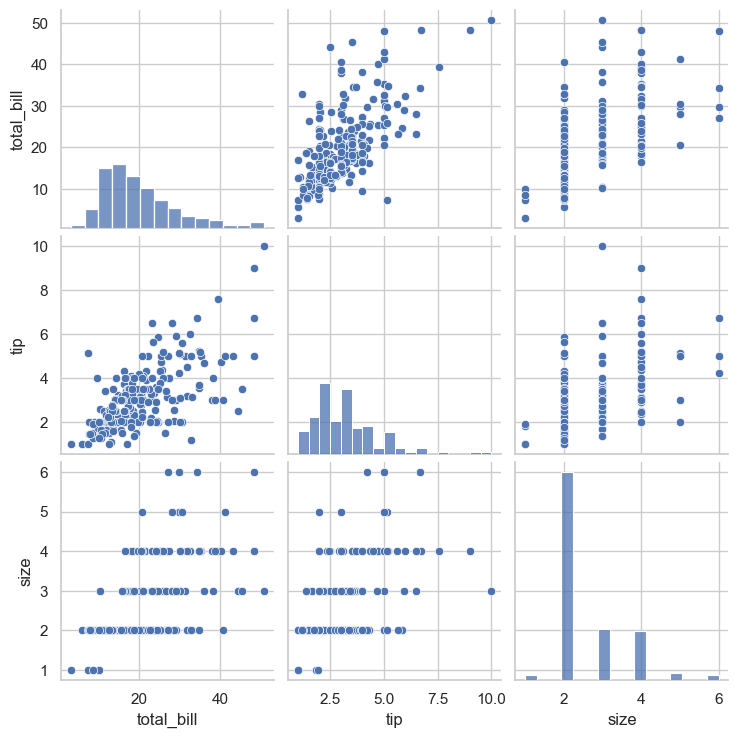

In [33]:
# Simple Pairplot

sns.pairplot(df)

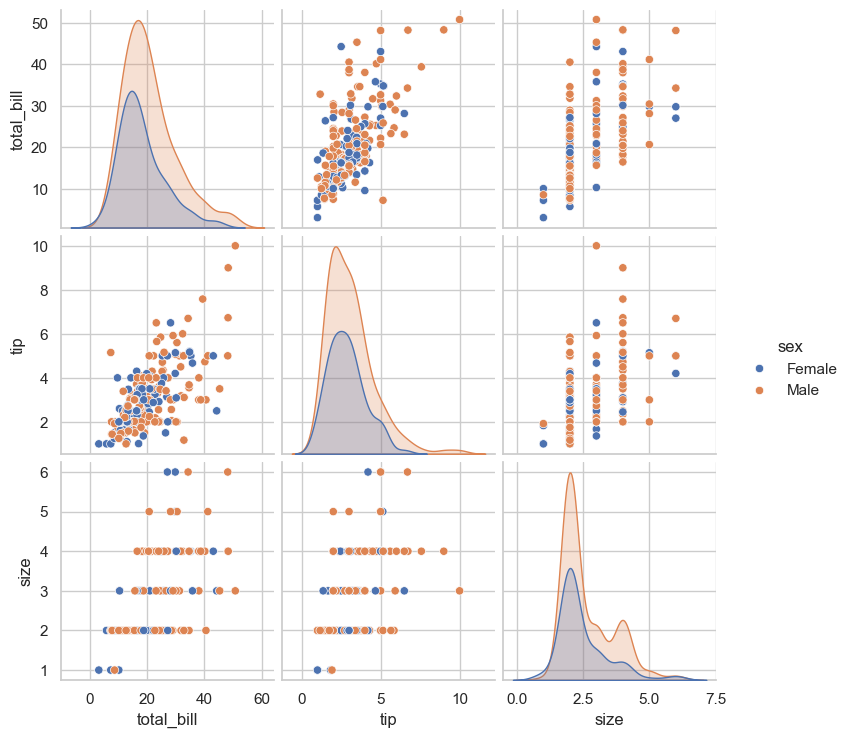

In [34]:
# Pairplot with sex hue

sns.pairplot(df,hue='sex')

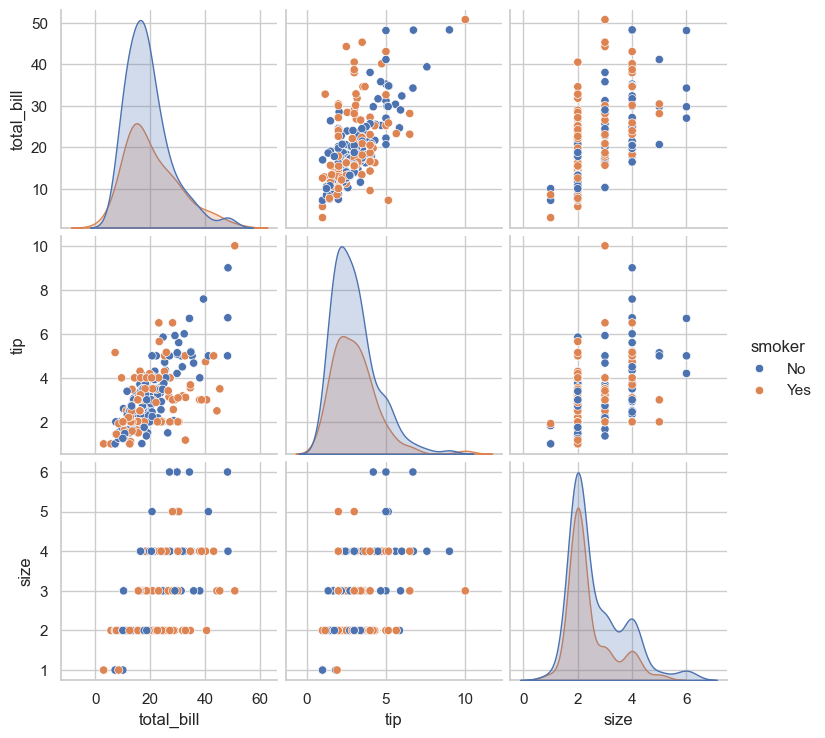

In [35]:
# Pairplot with smoker hue

sns.pairplot(df,hue='smoker')

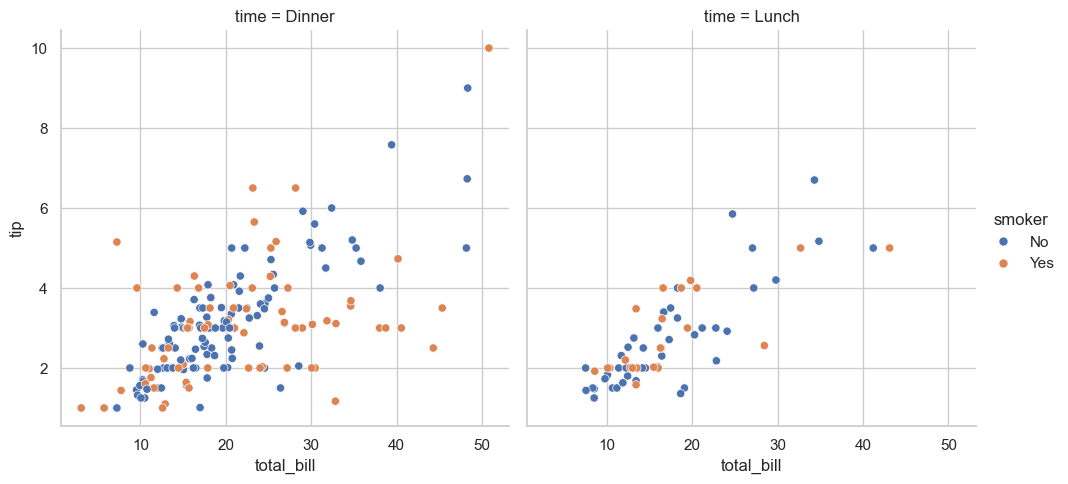

In [36]:
sns.relplot(y="tip",x="total_bill",hue="smoker",col="time",data=df)

# The above plot shows that:
### 1- the number of smokers in night is quite high as compared to daytime.
### 2- There are also some high amount of tip in the night than daytime
### 3- The amount of tip and total bill is not dependent on whether the customer is smoker or not.
### 4- The amount of tip and total bill are dependent variables.

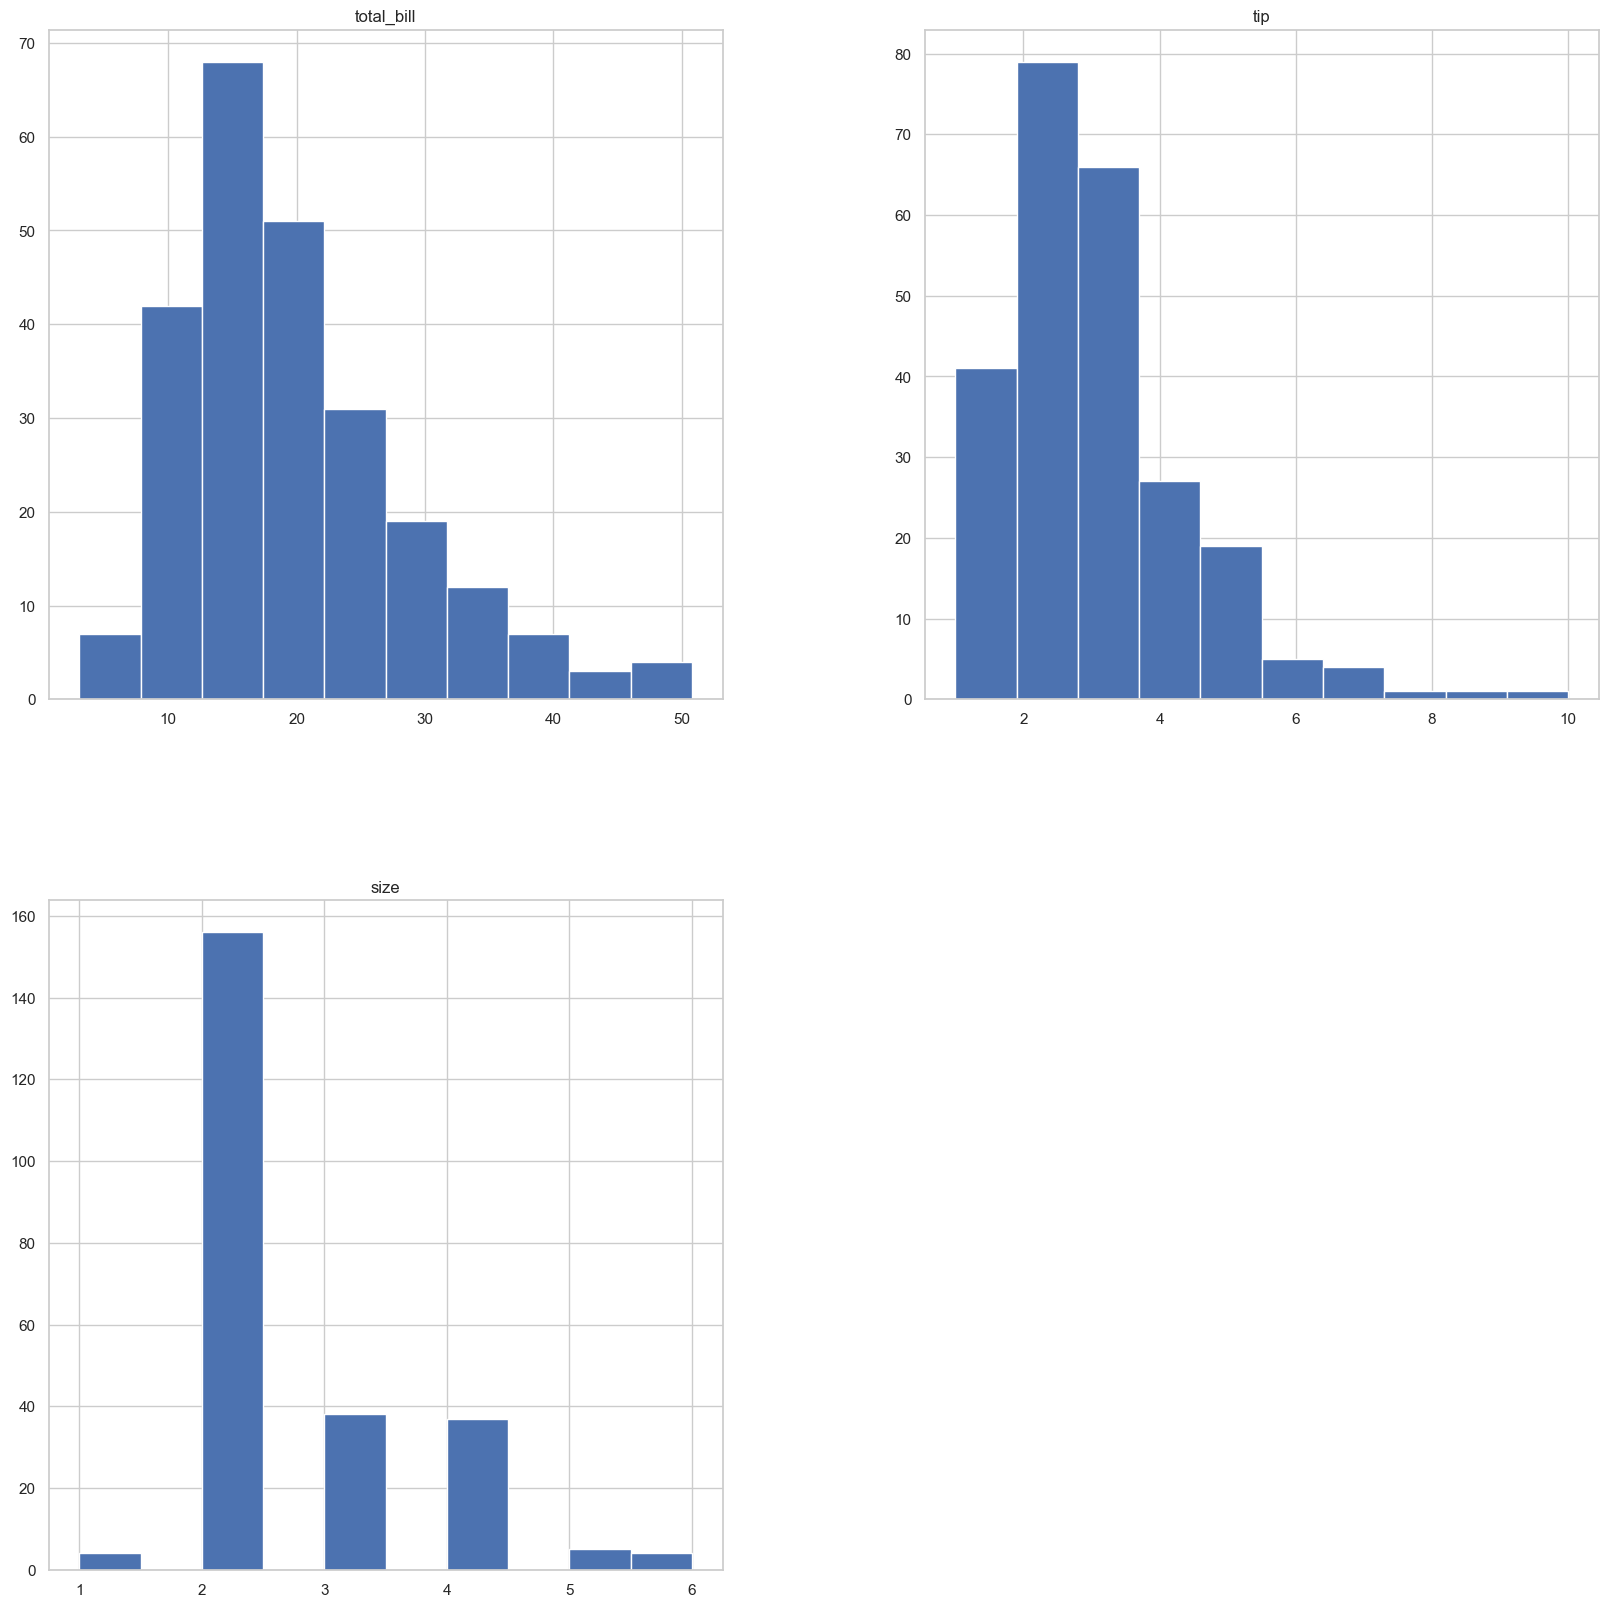

In [37]:
p = df.hist(figsize = (20,20))

# Correlation with Heatmap
 ### A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. It is very important in Feature Selection

In [38]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

In [39]:
categorical_cols = df.select_dtypes(include=[object]).columns
print(categorical_cols)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')


In [40]:
df = pd.get_dummies(df, columns=categorical_cols)
correlation = df.corr()

In [41]:
df = df.dropna(how='any', axis=0)
correlation = df.corr()

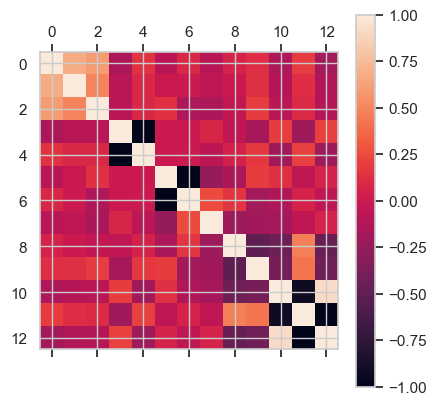

In [42]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame

# Print column names to verify 'sex' exists
print(df.columns)

# If 'sex' does not exist, correct the column name
# For example, if the correct column name is 'Sex'
sns.countplot(x = df['smoker'])

# Alternatively, you can use the `in` operator to check if 'sex' exists
if 'sex' in df.columns:
    sns.countplot(x = df['smoker'])
else:
    print("Column 'smoker' does not exist in the DataFrame.")

Index(['total_bill', 'tip', 'size', 'sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'],
      dtype='object')


KeyError: 'smoker'

In [ ]:
df['size'].value_counts().plot(kind='bar', title='Size of the Party',figsize=(20,8)) 

In [ ]:
df

In [ ]:
df['day_Sun'].value_counts() 

In [ ]:
df.replace({"Fri": 1, "Thur": 0, "Sat":2, "Sun": 3}, inplace=True)

In [ ]:
df

In [ ]:
df['time_Lunch'].value_counts()

In [ ]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

In [ ]:
sns.heatmap(df.corr())

# JoinPlot
### A join plot allows to study the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot

# Univariate Analysis

In [ ]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='hex')

In [ ]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')

# Pair plot

In [ ]:
#sns.pairplot(df)

In [ ]:
# sns.pairplot(df,hue='sex')

# Dist plot
Dist plot helps us to check the distribution of the columns feature



In [ ]:
sns.distplot(df['tip'])

In [ ]:
sns.distplot(df['tip'],kde=False,bins=10)

# Categorical Plots
Seaborn also helps us in doing the analysis on Categorical Data points. In this section we will discuss about

### boxplot
### violinplot
### countplot
### bar plot

In [ ]:
print(df.columns)

In [ ]:
df['sex'] = ...  # assign values to the new column

In [ ]:
df = df.rename(columns={'existing_column_name': 'sex'})

In [ ]:
sns.countplot(x='sex', data=df)

In [ ]:
sns.barplot(x='total_bill',y='sex',data=df)